# Read the data

In [24]:
import pandas as pd
# 讀取訓練檔 csv
df_train = pd.read_csv('buyComputer.csv')
features = df_train.columns.tolist()
features.remove('BuyComputer')

# Normalization

In [25]:
# Normalization
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# OrdinalEncoder: 把 categorical features 轉換成整數編碼(integer codes)
ordinalencoder = OrdinalEncoder()
data_encoded = ordinalencoder.fit_transform(df_train[features])
buy_encoded = pd.DataFrame(data_encoded, columns=features)

# LabelEncoder: 將類別資料轉換成數值順序，將該欄類別映射到整數，不會新增欄位
labelencoder = LabelEncoder()
target_encoded = labelencoder.fit_transform(df_train['BuyComputer'])
buy_encoded['BuyComputer'] = target_encoded
data_encoded

array([[2., 0., 0., 1.],
       [2., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 2., 0., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 0.],
       [0., 1., 1., 0.],
       [2., 2., 0., 1.],
       [2., 1., 1., 1.],
       [1., 2., 1., 1.],
       [2., 2., 1., 0.],
       [0., 2., 0., 0.],
       [0., 0., 1., 1.],
       [1., 2., 0., 0.]])

# Model Training - 使用 entropy ，深度 3 層

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model.fit(data_encoded, target_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Predict

In [27]:
y_pred = model.predict(data_encoded)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [28]:
from sklearn import metrics
acc = metrics.accuracy_score(target_encoded, y_pred)
print("Accuracy: {:.2f}".format(acc))

Accuracy: 0.86


# Predict test data

In [29]:
df_test =pd.read_csv("buyComputer_test.csv")
features = df_test.columns.tolist()
features.remove('BuyComputer')
test_data_encoded = ordinalencoder.transform(df_test[features])
X_test = pd.DataFrame(test_data_encoded, columns=features)

test_target_encoded = labelencoder.fit_transform(df_test['BuyComputer'])
y_test_pred = model.predict(test_data_encoded)
print('Misclassified samples: %d' % (y_test_pred != test_target_encoded).sum())

Misclassified samples: 1


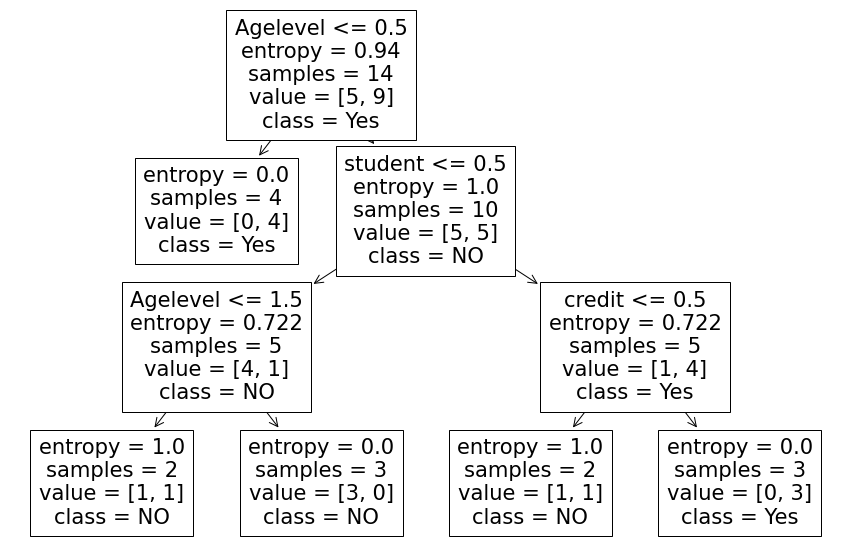

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
A=['NO', 'Yes']
F=['Agelevel','income','student','credit']
plot_tree(model, feature_names=F, class_names=A)

plt.show()

# 另一種畫圖套件

到 http://www.graphviz.org/download/ 下載並安裝 graphviz 即可 

In [31]:
# 產生 tree.dot 檔
from sklearn.tree import export_graphviz
A=['no', 'yes']
export_graphviz(model, 
                out_file='tree.dot', 
                feature_names=['agelevel', 'income', 'student', 'credit'], 
                class_names=A, 
                rounded = True, 
                proportion =False, precision = 2, filled = True)

In [ ]:
#!pip install graphviz

產生 tree.dot 檔後，開啟「命令提示字元」
輸入以下命令，產生 tree.png  

``` 
dot -Tpng .\tree.dot -o tree.png
```